Frecvența de eșantionare: 0.0002777777777777778 Hz
Intervalul de timp: 761 zile, 18287.0 ore
Frecvența Nyquist: 0.0001388888888888889 Hz


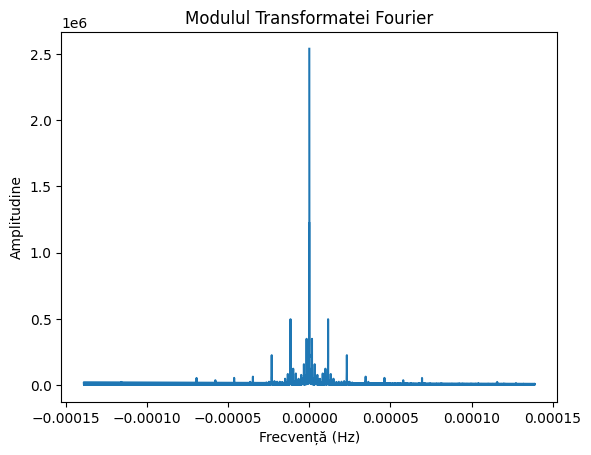

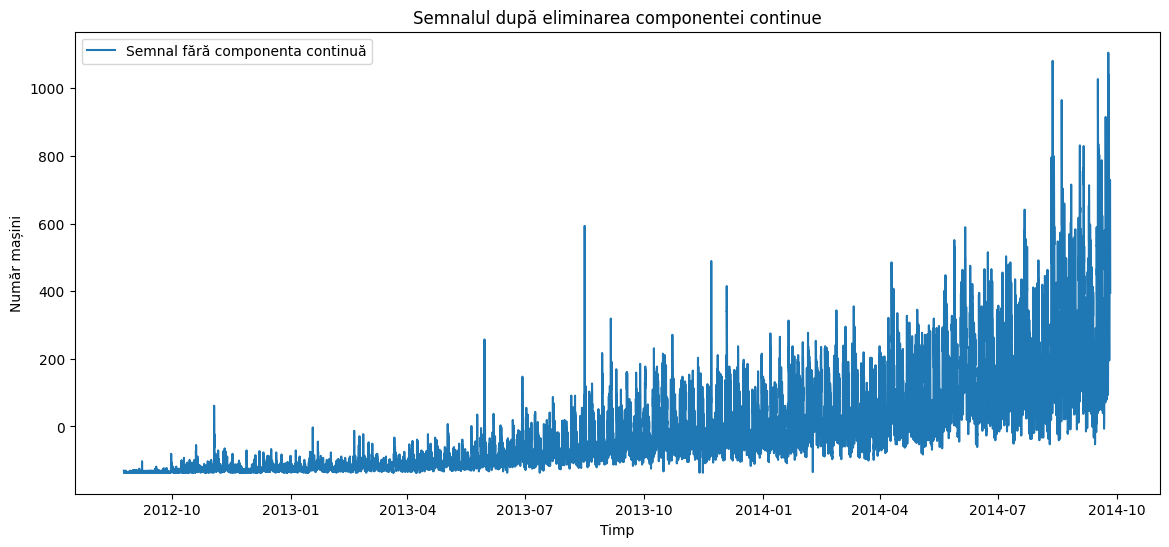

Top 4 frecvențe și magnitudini, excluzând componenta continuă:
Frecvența 1: 1.518907358802372e-08 Hz, Magnitudine: 1222623.348958034
Frecvența 2: -1.518907358802372e-08 Hz, Magnitudine: 1222623.3489580338
Frecvența 3: -3.037814717604744e-08 Hz, Magnitudine: 644088.23542051
Frecvența 4: 3.037814717604744e-08 Hz, Magnitudine: 644088.2354205098


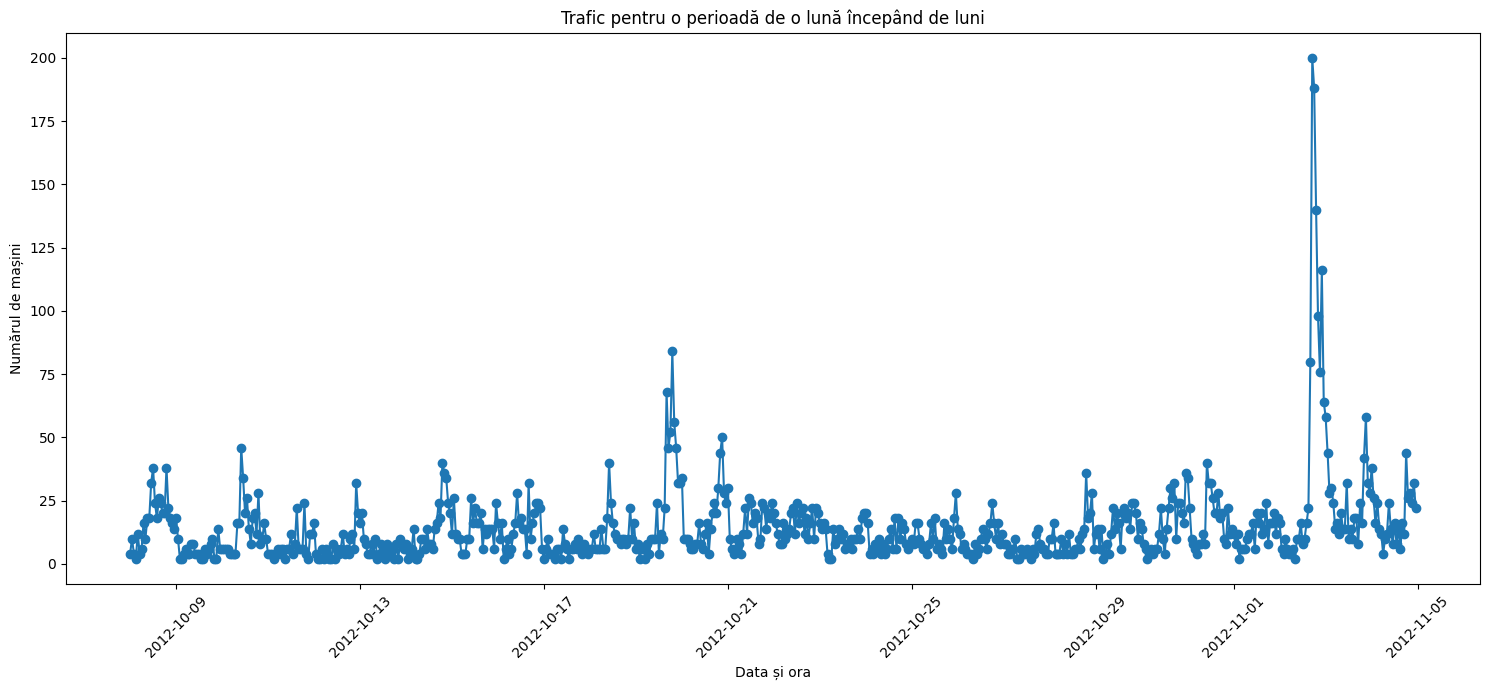

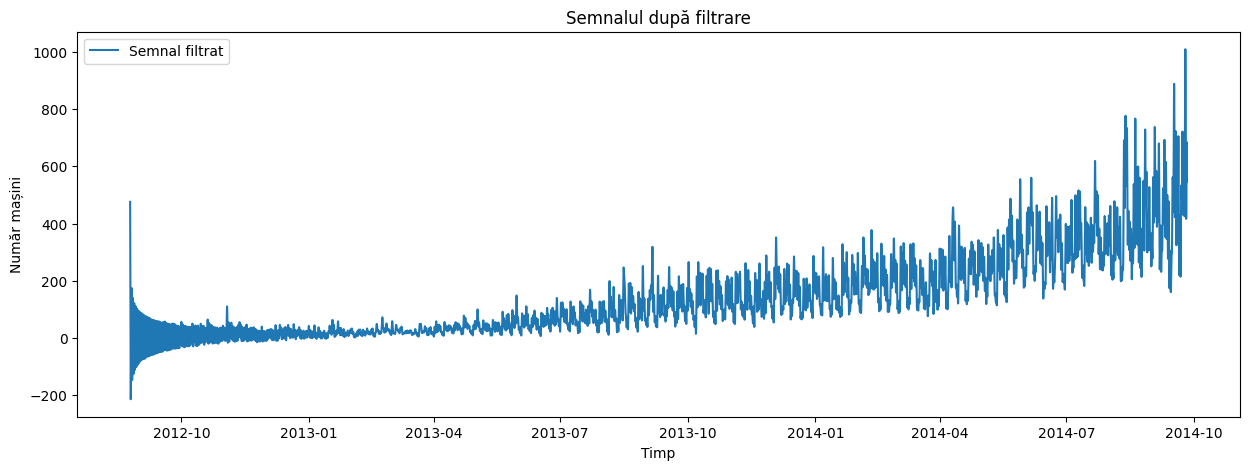

In [9]:


from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Încărcarea datelor
data = pd.read_csv('/Users/cristinaantonescu/PycharmProjects/Laborator-PS/Train.csv')
data['Datetime'] = pd.to_datetime(data['Datetime'], format='%d-%m-%Y %H:%M')

#a)
# Calculul frecvenței de eșantionare
time_differences = data['Datetime'].diff().dropna()
sampling_rate = 1 / time_differences.dt.total_seconds().mean()
print(f"Frecvența de eșantionare: {sampling_rate} Hz")

#b)
# Determinarea intervalului de timp pe care îl acoperă eșantioanele
start_time = data['Datetime'].min()
end_time = data['Datetime'].max()
time_interval = end_time - start_time
print(f"Intervalul de timp: {time_interval.days} zile, {time_interval.total_seconds() / (60 * 60)} ore")

#c)
# Calculul frecvenței Nyquist
nyquist_frequency = sampling_rate / 2
print(f"Frecvența Nyquist: {nyquist_frequency} Hz")

#d)
# Aplicarea transformatei Fourier
fft_result = np.fft.fft(data['Count'])

# Afișarea graficului modulelor transformatei
frequencies = np.fft.fftfreq(len(fft_result), d=1/sampling_rate)
plt.plot(frequencies, np.abs(fft_result))
plt.xlabel('Frecvență (Hz)')
plt.ylabel('Amplitudine')
plt.title('Modulul Transformatei Fourier')
plt.show()

#e)
# Calculul transformatei Fourier
fft_result = np.fft.fft(data['Count'])

# Eliminarea componentei continue
fft_result[0] = 0

# Calculul transformatei inverse Fourier pentru a obține semnalul fără componenta continuă
filtered_signal = np.fft.ifft(fft_result)

# Afișarea semnalului fără componenta continuă
plt.figure(figsize=(14, 6))
plt.plot(data['Datetime'], filtered_signal.real, label='Semnal fără componenta continuă')
plt.xlabel('Timp')
plt.ylabel('Număr mașini')
plt.title('Semnalul după eliminarea componentei continue')
plt.legend()
plt.show()

#f)
# Calculăm transformata Fourier
fft_result = np.fft.fft(data['Count'])

# Calculăm frecvențele corespunzătoare valorilor din transformata Fourier
frequencies = np.fft.fftfreq(len(fft_result), d=1/sampling_rate)

# Obținem modulul transformatei Fourier și sortăm valorile în ordine descrescătoare
fft_magnitudes = np.abs(fft_result)

# Excludem componenta continuă (la frecvența zero)
fft_magnitudes[0] = 0

# Obținem indicii valorilor sortate (excluzând componenta continuă)
sorted_indices = np.argsort(fft_magnitudes)[::-1]

# Determinăm primele 4 cele mai mari valori ale modulului transformatei și frecvențele corespunzătoare
top_frequencies = frequencies[sorted_indices][:4]
top_magnitudes = fft_magnitudes[sorted_indices][:4]

# Afișăm rezultatele
print("Top 4 frecvențe și magnitudini, excluzând componenta continuă:")
for i in range(4):
    print(f"Frecvența {i+1}: {top_frequencies[i]} Hz, Magnitudine: {top_magnitudes[i]}")

#g)
# Încărcăm din nou datele pentru a ne asigura că sunt procesate corect
data = pd.read_csv('/Users/cristinaantonescu/PycharmProjects/Laborator-PS/Train.csv')
data['Datetime'] = pd.to_datetime(data['Datetime'], format='%d-%m-%Y %H:%M')

# Găsim primul index după 1000 care corespunde unei zile de luni (0 este luni în dayofweek)
start_index = data[(data['Datetime'].dt.dayofweek == 0) & (data.index > 1000)].index[0]

# Selectăm o lună de date începând cu acest index
# O lună este aproximativ 4 săptămâni, așadar alegem 4 * 7 * 24 de ore de date
one_month_data = data.loc[start_index:start_index + 4 * 7 * 24 - 1]

# Vizualizăm graficul pentru o lună de trafic începând cu o zi de luni
plt.figure(figsize=(15, 7))
plt.plot(one_month_data['Datetime'], one_month_data['Count'], marker='o', linestyle='-')
plt.title('Trafic pentru o perioadă de o lună începând de luni')
plt.xlabel('Data și ora')
plt.ylabel('Numărul de mașini')
plt.xticks(rotation=45)
plt.tight_layout()  # Ajustează automat subplots pentru a se încadra în zona de desenare a figurii
plt.show()

#h)
#Metoda ar presupune următoarele pași:

#-Calcularea autocorelației pentru a identifica ciclicitatea semnalului.
#-Identificarea modelelor săptămânale și estimarea zilei săptămânii pentru fiecare eșantion.
#-Căutarea variațiilor neobișnuite care ar putea corespunde unor evenimente speciale sau sărbătorilor.
#-Analiza schimbărilor sezoniere pentru a determina perioada anului.

#Neajunsuri

#-Lipsa de precizie: Fără date externe pentru validare, orice estimare bazată strict pe analiza semnalului ar fi speculativă.
#-Variații neașteptate: Evenimentele atipice neanticipate (cum ar fi construcțiile pe drumuri sau greve) ar putea distorsiona modelele normale de trafic.

#Accuratețea metodei ar depinde de:

#-Calitatea și rezoluția datelor: Eșantionarea frecventă și consistentă este crucială.
#-Stabilitatea modelului de trafic: Presupunerea că modelul de trafic nu s-a schimbat semnificativ de la începutul măsurătorilor.

#i)
# Încărcăm din nou datele pentru a ne asigura că sunt procesate corect
data = pd.read_csv('/Users/cristinaantonescu/PycharmProjects/Laborator-PS/Train.csv')
data['Datetime'] = pd.to_datetime(data['Datetime'], format='%d-%m-%Y %H:%M')

# Calculăm transformata Fourier
fft_result = np.fft.fft(data['Count'])
frequencies = np.fft.fftfreq(len(fft_result), d=1/sampling_rate)

# Stabilim frecvența de tăiere
frecventa_taiere = 1 / (24 * 3600)  # 1/24 Hz

# Identificăm indicele pentru frecvența de tăiere
indice_taiere = np.where(frequencies > frecventa_taiere)[0][0]

# Creăm o copie a transformatei Fourier și eliminăm frecvențele înalte
fft_filtrat = fft_result.copy()
fft_filtrat[indice_taiere:-indice_taiere] = 0

# Aplicăm transformata Fourier inversă
semnal_filtrat = np.fft.ifft(fft_filtrat)

# Vizualizăm semnalul filtrat
plt.figure(figsize=(15, 5))
plt.plot(data['Datetime'], semnal_filtrat.real, label='Semnal filtrat')
plt.xlabel('Timp')
plt.ylabel('Număr mașini')
plt.title('Semnalul după filtrare')
plt.legend()
plt.show()

#explicatii

#Aici este graficul care arată semnalul după filtrarea și eliminarea componentelor de frecvență înaltă. Acest proces permite
#doar frecvențelor sub un anumit prag să treacă și atenuează componentele de frecvență mai înaltă.